<a href="https://colab.research.google.com/github/Tar-ive/simulations/blob/main/ev_tx_simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
import pandas as pd

# Load shapefile
shapefile_path = '/content/cb_2023_48_tract_500k.shp'
gdf = gpd.read_file(shapefile_path)

# Load CSV file
csv_path = '/content/2022_txpopest_county.csv'
df = pd.read_csv(csv_path)


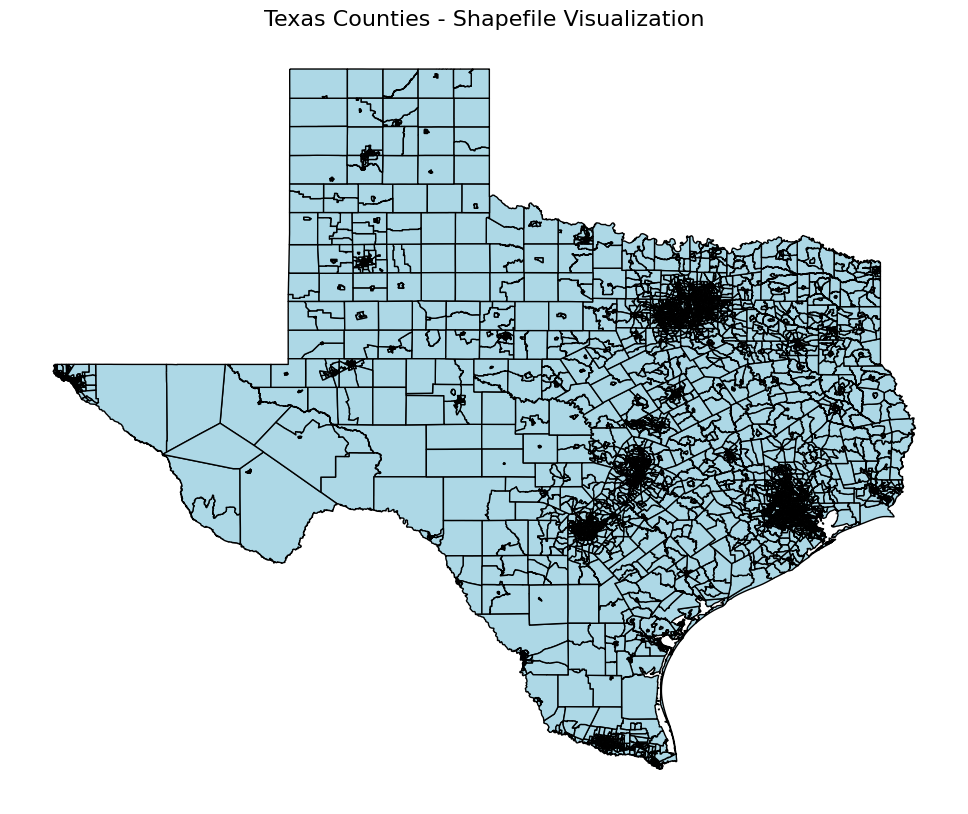

In [ ]:
counties = gpd.read_file(shapefile_path)

# Plot the shapefile
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
counties.plot(ax=ax, color='lightblue', edgecolor='black')

# Remove axis for a cleaner look
ax.axis('off')

# Add a title
plt.title('Texas Counties - Shapefile Visualization', fontsize=16)

# Show the plot
plt.show()

In [ ]:
# Merge the GeoDataFrame and DataFrame on the common column
# Convert 'GEOID' column to numeric type before merging
gdf['GEOID'] = pd.to_numeric(gdf['GEOID'])
merged_gdf = gdf.merge(df, left_on='GEOID', right_on='FIPS')

In [ ]:
gdf['GEOID'].shape

print(gdf['GEOID'].dtype)
print(df['FIPS'].dtype)


int64
int64


In [ ]:
print('FIPS shape',df['FIPS'].shape)
print("GDF shape:",gdf['GEOID'].shape)


FIPS shape (255,)
GDF shape: (6884,)


In [ ]:
# Ensure GEOID and FIPS are strings with leading zeros
gdf['GEOID'] = gdf['GEOID'].astype(str)
df['FIPS'] = df['FIPS'].astype(str)

# If necessary, pad the FIPS codes with leading zeros to ensure they match GEOID
df['FIPS'] = df['FIPS'].str.zfill(gdf['GEOID'].str.len().max())


In [ ]:
merged_gdf = gdf.merge(df, left_on='GEOID', right_on='FIPS', how='inner')
print(merged_gdf.shape)


(0, 23)


In [ ]:
print(gdf['GEOID'].unique()[:10])  # Show first 10 unique values
print(df['FIPS'].unique()[:10])    # Show first 10 unique values


['48195950100' '48375014800' '48375011900' '48073950801' '48085031643'
 '48085032008' '48085032012' '48085031708' '48097000600' '48097000200']
['00000000001' '00000000003' '00000000005' '00000000007' '00000000009'
 '00000000011' '00000000013' '00000000015' '00000000017' '00000000019']


In [ ]:
print(gdf['GEOID'].apply(len).unique())  # Check the length of GEOID values
print(df['FIPS'].apply(len).unique())    # Check the length of FIPS values


[11]
[11]


In [ ]:
df['FIPS'] = df['FIPS'].astype(str).str.lstrip('0')
df['FIPS'] = df['FIPS'].str.zfill(11)


In [ ]:
gdf['GEOID'] = gdf['GEOID'].astype(str)
df['FIPS'] = df['FIPS'].astype(str)


In [ ]:
merged_gdf = gdf.merge(df, left_on='GEOID', right_on='FIPS', how='inner')


In [ ]:
print(merged_gdf.shape)


(0, 23)


<ipython-input-5-cd96227fff52>:5: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  merged_gdf.plot(column='july1_2022_pop_est',


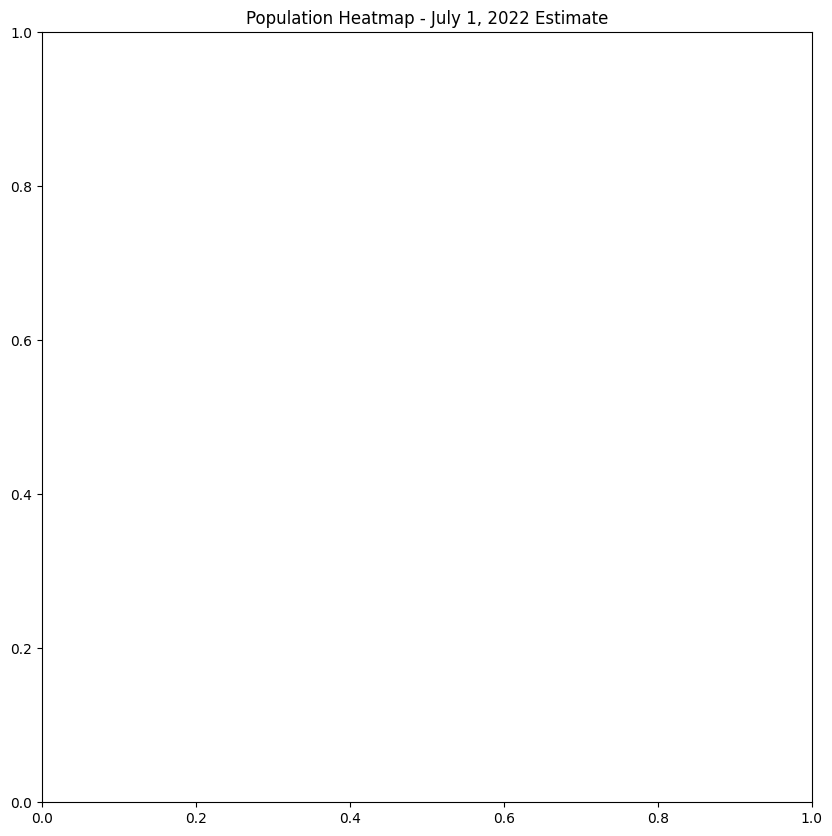

In [ ]:
import matplotlib.pyplot as plt

# Plot the heatmap
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
merged_gdf.plot(column='july1_2022_pop_est',
                cmap='OrRd',
                linewidth=0.8,
                ax=ax,
                edgecolor='0.8',
                legend=True)

plt.title('Population Heatmap - July 1, 2022 Estimate')
plt.show()


CSV Data:
   FIPS    county  census_2020_count  july1_2022_pop_est  jan1_2023_pop_est  \
0     1  Anderson              57922               57573              57848   
1     3   Andrews              18610               18732              18773   
2     5  Angelina              86395               86380              86354   
3     7   Aransas              23830               24945              25219   
4     9    Archer               8560                8652               8712   

   num_chg_20_22  num_chg_20_23  pct_chg_20_22  pct_chg_20_23  
0           -349            -74           -0.6           -0.1  
1            122            163            0.7            0.9  
2            -15            -41           -0.0           -0.0  
3           1115           1389            4.7            5.8  
4             92            152            1.1            1.8  

CSV Columns: Index(['FIPS', 'county', 'census_2020_count', 'july1_2022_pop_est',
       'jan1_2023_pop_est', 'num_chg_20_22', 'num

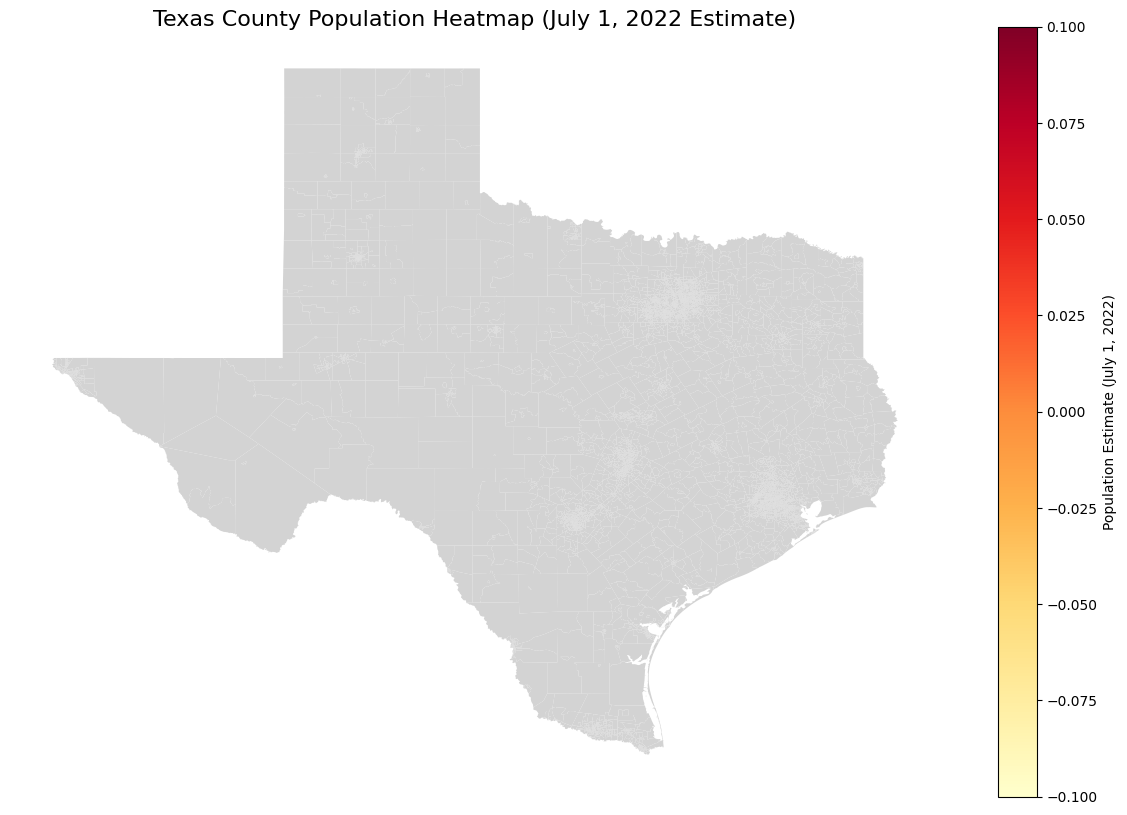

<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the population data
df = pd.read_csv('2022_txpopest_county.csv')

# Load Texas counties shapefile
counties = gpd.read_file('/content/cb_2023_48_tract_500k.shp')

# Print the first few rows and column names of both dataframes
print("CSV Data:")
print(df.head())
print("\nCSV Columns:", df.columns)

print("\nShapefile Data:")
print(counties.head())
print("\nShapefile Columns:", counties.columns)

# Check for the column that contains county names in the shapefile
county_name_column = 'NAME'  # Adjust this if it's different in your shapefile

# Print unique values from both datasets to check for discrepancies
print("\nUnique counties in CSV:")
print(df['county'].unique())

print("\nUnique counties in Shapefile:")
print(counties[county_name_column].unique())

# Try to merge and print the result
merged = counties.merge(df, left_on=county_name_column, right_on='county', how='left')
print("\nMerged Shape:", merged.shape)
print("\nMerged Data:")
print(merged.head())

# Count and print the number of successful merges
successful_merges = merged[merged['july1_2022_pop_est'].notna()].shape[0]
print(f"\nSuccessful merges: {successful_merges} out of {len(counties)} counties")

# Plot the data we have, even if it's incomplete
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.plot(column='july1_2022_pop_est', ax=ax, legend=True,
            legend_kwds={'label': 'Population Estimate (July 1, 2022)'},
            cmap='YlOrRd', missing_kwds={'color': 'lightgrey'})

ax.axis('off')
plt.title('Texas County Population Heatmap (July 1, 2022 Estimate)', fontsize=16)
plt.show()

# Save the plot
plt.savefig('texas_population_heatmap_debug.png', dpi=300, bbox_inches='tight')

Successful merges: 6878 out of 6884 counties

Unmatched counties:
['DeWitt', 'DeWitt', 'DeWitt', 'DeWitt', 'DeWitt', 'DeWitt']


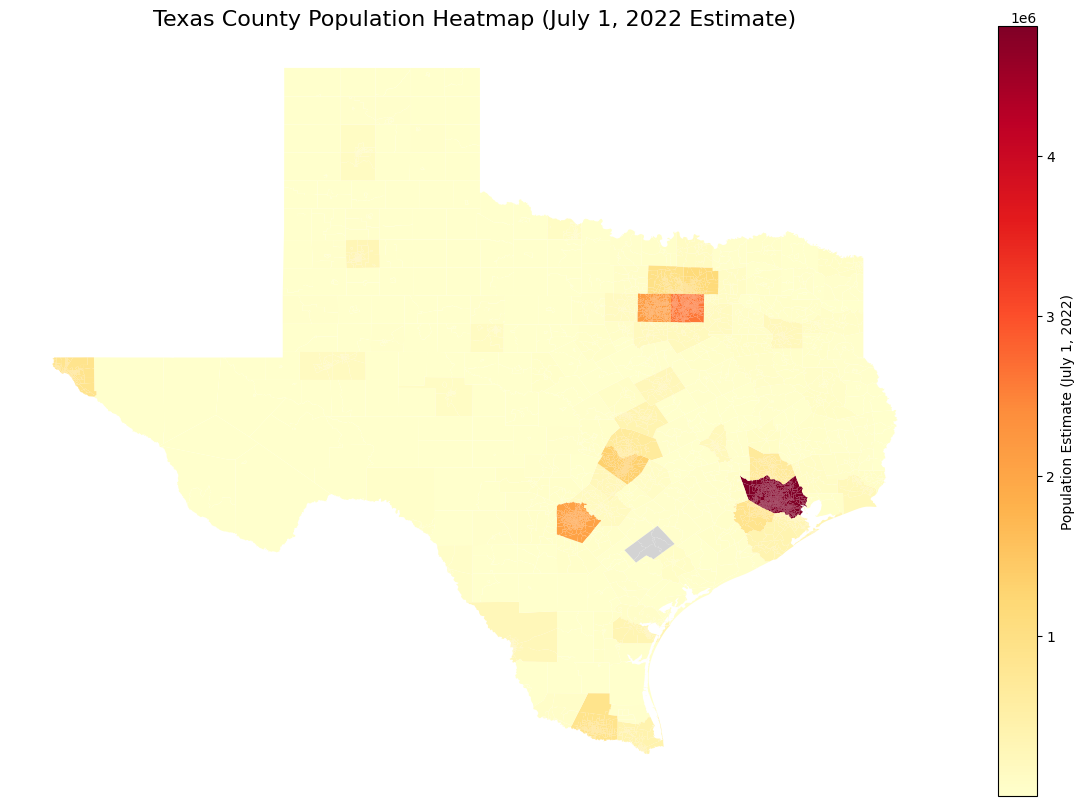


Population Summary Statistics:
count    6.878000e+03
mean     1.559574e+06
std      1.656017e+06
min      5.400000e+01
25%      1.819730e+05
50%      8.883800e+05
75%      2.625702e+06
max      4.813571e+06
Name: july1_2022_pop_est, dtype: float64


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the population data
df = pd.read_csv('2022_txpopest_county.csv')

# Load Texas counties shapefile
counties = gpd.read_file('/content/cb_2023_48_tract_500k.shp')

# Clean up the county names in the shapefile
counties['clean_county'] = counties['NAMELSADCO'].str.replace(' County', '')

# Merge the data
merged = counties.merge(df, left_on='clean_county', right_on='county', how='left')

# Print merge results
print(f"Successful merges: {merged['july1_2022_pop_est'].notna().sum()} out of {len(counties)} counties")

# Check for unmatched counties
unmatched = merged[merged['july1_2022_pop_est'].isna()]['clean_county']
print("\nUnmatched counties:")
print(unmatched.tolist())

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.plot(column='july1_2022_pop_est', ax=ax, legend=True,
            legend_kwds={'label': 'Population Estimate (July 1, 2022)'},
            cmap='YlOrRd', missing_kwds={'color': 'lightgrey'})

ax.axis('off')
plt.title('Texas County Population Heatmap (July 1, 2022 Estimate)', fontsize=16)
plt.show()

# Save the plot
plt.savefig('texas_population_heatmap_corrected.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\nPopulation Summary Statistics:")
print(merged['july1_2022_pop_est'].describe())

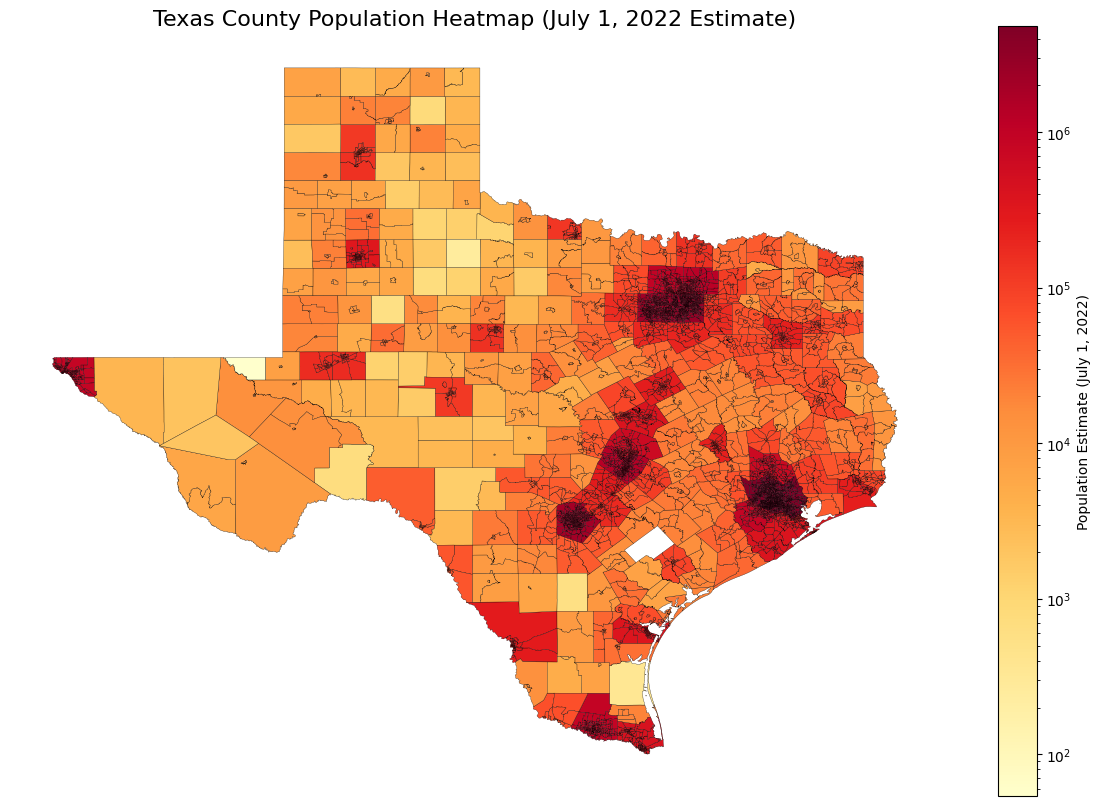

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.colors as colors

# Create a logarithmic color scale
norm = colors.LogNorm(vmin=merged['july1_2022_pop_est'].min(), vmax=merged['july1_2022_pop_est'].max())

fig, ax = plt.subplots(1, 1, figsize=(15, 10))

merged.plot(column='july1_2022_pop_est', ax=ax, norm=norm,
            legend=True, legend_kwds={'label': 'Population Estimate (July 1, 2022)'},
            cmap='YlOrRd', edgecolor='black', linewidth=0.2)

ax.axis('off')
plt.title('Texas County Population Heatmap (July 1, 2022 Estimate)', fontsize=16)
plt.show()

plt.savefig('texas_population_heatmap_improved.png', dpi=300, bbox_inches='tight')

Successful merges: 6884 out of 6884 counties

Unmatched counties:
[]


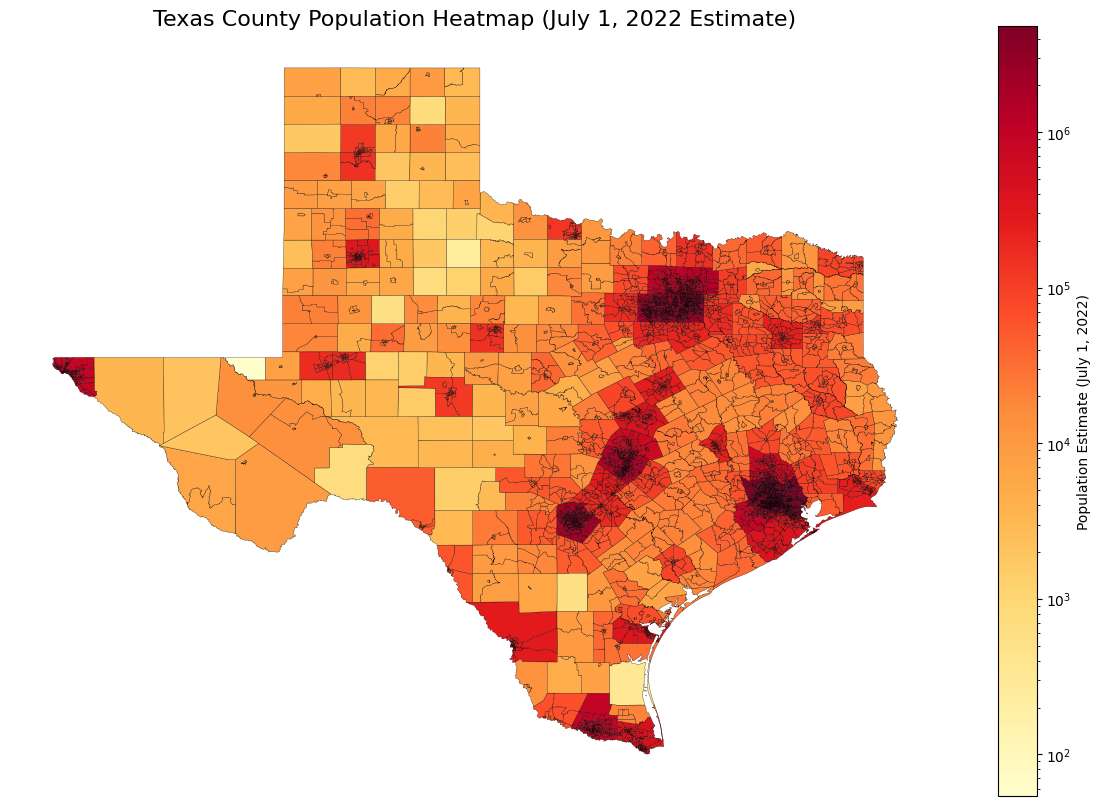


Population Summary Statistics:
count    6.884000e+03
mean     1.558232e+06
std      1.655919e+06
min      5.400000e+01
25%      1.819730e+05
50%      8.883800e+05
75%      2.625702e+06
max      4.813571e+06
Name: july1_2022_pop_est, dtype: float64


<Figure size 640x480 with 0 Axes>

In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# Load the population data
df = pd.read_csv('2022_txpopest_county.csv')

# Load Texas counties shapefile
counties = gpd.read_file('/content/cb_2023_48_tract_500k.shp')

# Clean up the county names in the shapefile
counties['clean_county'] = counties['NAMELSADCO'].str.replace(' County', '')

# Function to standardize county names
def standardize_county_name(name):
    name = name.lower()
    name = name.replace('de witt', 'dewitt')
    # Add more replacements here if needed
    return name.title()

# Apply standardization to both dataframes
counties['clean_county'] = counties['clean_county'].apply(standardize_county_name)
df['county'] = df['county'].apply(standardize_county_name)

# Merge the data
merged = counties.merge(df, left_on='clean_county', right_on='county', how='left')

# Print merge results
print(f"Successful merges: {merged['july1_2022_pop_est'].notna().sum()} out of {len(counties)} counties")

# Check for unmatched counties
unmatched = merged[merged['july1_2022_pop_est'].isna()]['clean_county']
print("\nUnmatched counties:")
print(unmatched.tolist())

# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Create a logarithmic color scale
norm = colors.LogNorm(vmin=merged['july1_2022_pop_est'].min(), vmax=merged['july1_2022_pop_est'].max())

merged.plot(column='july1_2022_pop_est', ax=ax, norm=norm,
            legend=True, legend_kwds={'label': 'Population Estimate (July 1, 2022)'},
            cmap='YlOrRd', edgecolor='black', linewidth=0.2)

ax.axis('off')
plt.title('Texas County Population Heatmap (July 1, 2022 Estimate)', fontsize=16)
plt.show()

# Save the plot
plt.savefig('texas_population_heatmap_final.png', dpi=300, bbox_inches='tight')

# Print summary statistics
print("\nPopulation Summary Statistics:")
print(merged['july1_2022_pop_est'].describe())

# If there are still unmatched counties, print their details
if not unmatched.empty:
    print("\nDetails of unmatched counties:")
    print(counties[counties['clean_county'].isin(unmatched)][['clean_county', 'NAMELSADCO']])
    print("\nAvailable counties in population data:")
    print(df['county'].tolist())

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import time
import os
from collections import defaultdict

def create_texas_roadway_graph(file_path):
    edges = defaultdict(list)
    nodes = set()
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('#') or line.strip() == '':
                continue
            from_node, to_node = map(int, line.strip().split())
            edges[from_node].append(to_node)
            nodes.add(from_node)
            nodes.add(to_node)

    node_to_index = {node: idx for idx, node in enumerate(sorted(nodes))}
    indexed_edges = {node_to_index[node]: [node_to_index[target] for target in targets]
                     for node, targets in edges.items()}

    return indexed_edges, len(nodes), node_to_index

def gpu_layout(edges, num_nodes, iterations=50, batch_size=1000):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    pos = torch.rand(num_nodes, 2, device=device)

    edge_index = torch.tensor([[s, t] for s, targets in edges.items() for t in targets],
                              dtype=torch.long, device=device).t()

    for i in range(iterations):
        force = torch.zeros_like(pos)
        for start in range(0, edge_index.size(1), batch_size):
            end = start + batch_size
            batch_edges = edge_index[:, start:end]

            diff = pos[batch_edges[0]] - pos[batch_edges[1]]
            dist = torch.norm(diff, dim=1, keepdim=True) + 1e-6
            batch_force = diff / dist

            force.scatter_add_(0, batch_edges[0].unsqueeze(1).expand(-1, 2), -batch_force)
            force.scatter_add_(0, batch_edges[1].unsqueeze(1).expand(-1, 2), batch_force)

        pos += force * 0.1
        pos -= pos.min(dim=0)[0]
        pos /= pos.max()

        if i % 5 == 0:
            print(f"Iteration {i}/{iterations} complete")

        # Early stopping condition
        if torch.max(torch.abs(force)) < 0.01:
            print(f"Converged after {i} iterations")
            break

    return pos.cpu().numpy()

def visualize_graph(edges, pos, output_file='texas_road_network.png'):
    plt.figure(figsize=(12, 8))
    for source, targets in edges.items():
        source_pos = pos[source]
        for target in targets:
            target_pos = pos[target]
            plt.plot([source_pos[0], target_pos[0]], [source_pos[1], target_pos[1]], 'b-', linewidth=0.1, alpha=0.5)

    plt.title("Texas Road Network")
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    plt.close()
    print(f"The graph image has been saved as '{output_file}' in your Colab environment.")

def main():
    file_path = '/content/roadNet-TX 2.txt'  # Update this path if your file is located elsewhere

    if not os.path.exists(file_path):
        print(f"Error: The file {file_path} does not exist.")
        return

    start_time = time.time()

    print("Creating graph...")
    edges, num_nodes, node_to_index = create_texas_roadway_graph(file_path)
    print(f"Number of nodes: {num_nodes}")
    print(f"Number of edges: {sum(len(targets) for targets in edges.values())}")

    print("Calculating layout...")
    pos = gpu_layout(edges, num_nodes)

    print("Visualizing graph...")
    visualize_graph(edges, pos)

    end_time = time.time()
    print(f"Total execution time: {end_time - start_time:.2f} seconds")

if __name__ == "__main__":
    main()

Creating graph...
Number of nodes: 1379917
Number of edges: 3843320
Calculating layout...
Iteration 0/50 complete
Iteration 5/50 complete
Iteration 10/50 complete
Iteration 15/50 complete
Iteration 20/50 complete
Iteration 25/50 complete
Iteration 30/50 complete
Iteration 35/50 complete
Iteration 40/50 complete
Iteration 45/50 complete
Visualizing graph...
The graph image has been saved as 'texas_road_network.png' in your Colab environment.
Total execution time: 3733.09 seconds


In [ ]:
!pip install geopandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.6/323.6 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.1/23.1 MB 60.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 64.0 MB/s eta 0:00:00


In [ ]:
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 844.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 69.4 MB/s eta 0:00:00
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [ ]:
!pip install cudf

  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for cudf
  Running setup.py clean for cudf
Failed to build cudf
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (cudf)


In [ ]:
# Install necessary libraries
!pip install osmnx matplotlib

import os
import time
import networkx as nx
import osmnx as ox
import matplotlib.pyplot as plt
from google.colab import files

def download_texas_road_network():
    print("Downloading Texas road network data...")
    # Define the bounding box for Texas
    bbox = (-106.6456, 25.8371, -93.5083, 36.5007)

    # Download the road network for Texas
    G = ox.graph_from_bbox(bbox[1], bbox[3], bbox[0], bbox[2], network_type='drive')

    print("Download complete. Processing data...")
    return G

def visualize_road_network(G, output_file='texas_road_network_geo.png'):
    print("Creating visualization...")
    start_time = time.time()

    # Create plot
    fig, ax = plt.subplots(figsize=(20, 20))

    # Plot the graph
    ox.plot_graph(G, ax=ax, node_size=0, edge_linewidth=0.5, edge_color='#1e90ff')

    ax.set_aspect('equal')
    ax.axis('off')
    plt.title("Texas Road Network (Geographically Accurate)", fontsize=16)

    plt.tight_layout()
    plt.savefig(output_file, dpi=300, bbox_inches='tight')
    print(f"Visualization saved as {output_file}")
    files.download(output_file)  # This will download the file in Colab

    end_time = time.time()
    print(f"Visualization completed in {end_time - start_time:.2f} seconds")

def main():
    if os.path.exists('/content/texas_road_network.graphml'):
        print("Loading existing road network data...")
        G = ox.load_graphml('/content/texas_road_network.graphml')
    else:
        G = download_texas_road_network()
        ox.save_graphml(G, '/content/texas_road_network.graphml')

    print(f"Network has {len(G.nodes)} nodes and {len(G.edges)} edges")

    visualize_road_network(G)

if __name__ == "__main__":
    main()

  Using cached osmnx-1.9.4-py3-none-any.whl.metadata (4.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 10.5 MB/s eta 0:00:00


<ipython-input-5-fa9021561d59>:17: FutureWarning: The `north`, `south`, `east`, and `west` parameters are deprecated and will be removed in the v2.0.0 release. Use the `bbox` parameter instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.graph_from_bbox(bbox[1], bbox[3], bbox[0], bbox[2], network_type='drive')
<ipython-input-5-fa9021561d59>:17: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = ox.graph_from_bbox(bbox[1], bbox[3], bbox[0], bbox[2], network_type='drive')
/usr/local/lib/python3.10/dist-packages/osmnx/_overpass.py:254: UserWarning: This area is 592 times your configured Overpass max query area size. It will automatically be divided up into multiple sub-queries accordingly. This may take a long time.
  multi_poly_proj = utils_geo._consolidate_subdivide_geometry(poly_proj)


In [ ]:
from numba import cuda

In [ ]:
print(f"CUDA available: {cuda.is_available()}")
if cuda.is_available():
    print(f"CUDA device: {cuda.get_current_device().name}")


CUDA available: True
CUDA device: b'Tesla T4'
